# Nairobi Ambulance Challenge - Data exploration and preprocessing

### Bill Ton Hoang Nguyen and Ignacio Roldan

1) Define Algorithm - Find a suitable algorithm for the task. Look into boosting techniques such as LightGBM or XGBoost. Since our data will be tabular (I think) neural nets will not behave too good.

2) Define input vector - It migth be a table where each position have some features associated such as weather or segment info


In [1]:
#Import libraries

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from lightgbm import LGBMClassifier

## Training data

In [2]:
# Load the training data about crashes
df = pd.read_csv('Data/Train.csv', parse_dates=['datetime'])
print(df.shape)
df.head(10)

(6318, 4)


,uid,datetime,latitude,longitude
0,1,2018-01-01 00:25:46,-1.188850,36.931382
1,2,2018-01-01 02:02:39,-0.662939,37.208730
2,3,2018-01-01 02:31:49,-0.662939,37.208730
3,4,2018-01-01 03:04:01,-1.288087,36.826583
4,5,2018-01-01 03:58:49,-1.188850,36.931382
5,6,2018-01-01 04:04:09,-0.662939,37.208730
6,7,2018-01-01 05:31:17,-1.165228,36.960008
7,8,2018-01-01 07:57:56,-1.301303,36.820903
8,9,2018-01-01 09:57:27,-1.134640,36.848220
9,10,2018-01-01 10:48:59,-1.117207,37.008278


## Weather data

In [3]:
weather_data = pd.read_csv('Data/Weather_Nairobi_Daily_GFS.csv', parse_dates=['Date'])

weather_columns = ["precipitable_water_entire_atmosphere", "relative_humidity_2m_above_ground",
                  "specific_humidity_2m_above_ground", "temperature_2m_above_ground", "u_component_of_wind_10m_above_ground",
                  "v_component_of_wind_10m_above_ground"]

In [4]:
# Weather with NaN values / Dates with no weather data
weather_data.isnull().sum()
weather_nan = weather_data[weather_data.isna().any(axis=1)]
print(weather_nan)

################## Deleting rows wit NaN values ##################

is_NaN = weather_data.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = weather_data[row_has_NaN]

for index, row in rows_with_NaN.iterrows():
    weather_data = weather_data.drop(index)
    df = df.drop(index)
    
weather_data.info()

         Date  precipitable_water_entire_atmosphere  \
74 2018-03-16                                   NaN   
75 2018-03-17                                   NaN   
76 2018-03-18                                   NaN   

    relative_humidity_2m_above_ground  specific_humidity_2m_above_ground  \
74                                NaN                                NaN   
75                                NaN                                NaN   
76                                NaN                                NaN   

    temperature_2m_above_ground  u_component_of_wind_10m_above_ground  \
74                          NaN                                   NaN   
75                          NaN                                   NaN   
76                          NaN                                   NaN   

    v_component_of_wind_10m_above_ground  
74                                   NaN  
75                                   NaN  
76                                   NaN  
<class 'p

##### precipitable_water_entire_atmosphere

precipitable_water_entire_atmosphere : 
(22.4, 24.72]      152
(20.08, 22.4]      111
(27.04, 29.36]     106
(24.72, 27.04]     105
(17.76, 20.08]      86
(29.36, 31.68]      62
(15.44, 17.76]      40
(31.68, 34.0]       37
(13.12, 15.44]      22
(10.776, 13.12]      7
Name: precipitable_water_entire_atmosphere, dtype: int64


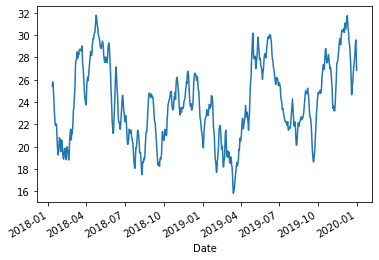

In [5]:
# Table of column values

print(weather_columns[0] + " : ")
print(weather_data[weather_columns[0]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['precipitable_water_entire_atmosphere'].rolling(10).mean().plot()

##### relative_humidity_2m_above_ground

relative_humidity_2m_above_ground : 
(85.055, 90.412]    253
(79.699, 85.055]    164
(90.412, 95.769]    137
(74.342, 79.699]     65
(68.985, 74.342]     46
(63.628, 68.985]     26
(58.271, 63.628]     22
(52.914, 58.271]      9
(42.145, 47.557]      4
(47.557, 52.914]      2
Name: relative_humidity_2m_above_ground, dtype: int64


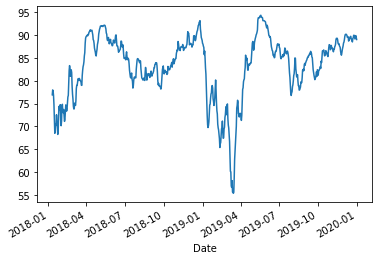

In [6]:
# Table of column values

print(weather_columns[1] + " : ")
print(weather_data[weather_columns[1]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['relative_humidity_2m_above_ground'].rolling(10).mean().plot()

##### specific_humidity_2m_above_ground

specific_humidity_2m_above_ground : 
(0.0112, 0.0119]      173
(0.0119, 0.0126]      140
(0.0105, 0.0112]      116
(0.00983, 0.0105]      91
(0.00914, 0.00983]     73
(0.0126, 0.0133]       55
(0.00845, 0.00914]     45
(0.00776, 0.00845]     21
(0.00707, 0.00776]     11
(0.00537, 0.00707]      3
Name: specific_humidity_2m_above_ground, dtype: int64


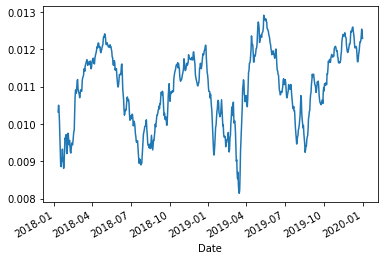

In [7]:
# Table of column values

print(weather_columns[2] + " : ")
print(weather_data[weather_columns[2]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['specific_humidity_2m_above_ground'].rolling(10).mean().plot()

##### temperature_2m_above_ground

temperature_2m_above_ground : 
(15.021, 15.839]                225
(14.203, 15.021]                162
(15.839, 16.657]                135
(13.386, 14.203]                 93
(16.657, 17.475]                 57
(12.568, 13.386]                 34
(11.741000000000001, 12.568]     12
(17.475, 18.292]                  7
(18.292, 19.11]                   2
(19.11, 19.928]                   1
Name: temperature_2m_above_ground, dtype: int64


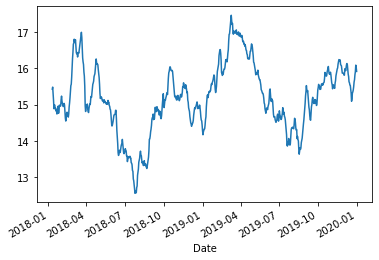

In [8]:
# Table of column values

print(weather_columns[3] + " : ")
print(weather_data[weather_columns[3]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['temperature_2m_above_ground'].rolling(10).mean().plot()

##### u_component_of_wind_10m_above_ground

u_component_of_wind_10m_above_ground : 
(-2.137, -1.201]    226
(-3.073, -2.137]    191
(-1.201, -0.265]    124
(-4.009, -3.073]    100
(-0.265, 0.671]      46
(-4.944, -4.009]     18
(0.671, 1.606]       10
(1.606, 2.542]        5
(-5.891, -4.944]      5
(2.542, 3.478]        3
Name: u_component_of_wind_10m_above_ground, dtype: int64


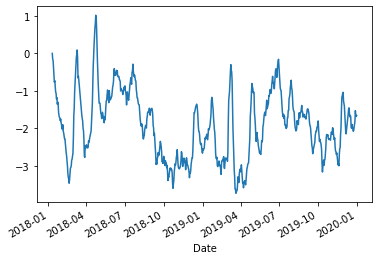

In [9]:
# Table of column values

print(weather_columns[4] + " : ")
print(weather_data[weather_columns[4]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['u_component_of_wind_10m_above_ground'].rolling(10).mean().plot()

##### v_component_of_wind_10m_above_ground

v_component_of_wind_10m_above_ground : 
(-1.489, -0.912]    130
(-0.912, -0.335]    125
(-0.335, 0.242]     113
(-2.066, -1.489]    112
(-2.643, -2.066]     89
(0.242, 0.819]       61
(-3.22, -2.643]      53
(-3.803, -3.22]      21
(0.819, 1.396]       19
(1.396, 1.973]        5
Name: v_component_of_wind_10m_above_ground, dtype: int64


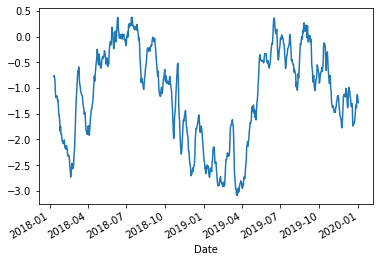

In [10]:
# Table of column values

print(weather_columns[5] + " : ")
print(weather_data[weather_columns[5]].value_counts(bins = 10))

#Plot
weather_data.set_index('Date')['v_component_of_wind_10m_above_ground'].rolling(10).mean().plot()